# Data Dictionary

There are multiple variables in the dataset which can be cleanly divided in 3 categories:

### Demographic information about customers

<b>customer_id</b> - Customer id

<b>vintage</b> - Vintage of the customer with the bank in number of days

<b>age</b> - Age of customer

<b>gender</b> - Gender of customer

<b>dependents</b> - Number of dependents

<b>occupation</b> - Occupation of the customer 

<b>city</b> - City of customer (anonymised)


### Customer Bank Relationship


<b>customer_nw_category</b> - Net worth of customer (3:Low 2:Medium 1:High)

<b>branch_code</b> - Branch Code for customer account

<b>days_since_last_transaction</b> - No of Days Since Last Credit in Last 1 year


### Transactional Information

<b>current_balance</b> - Balance as of today

<b>previous_month_end_balance</b> - End of Month Balance of previous month


<b>average_monthly_balance_prevQ</b> - Average monthly balances (AMB) in Previous Quarter

<b>average_monthly_balance_prevQ2</b> - Average monthly balances (AMB) in previous to previous quarter

<b>current_month_credit</b> - Total Credit Amount current month

<b>previous_month_credit</b> - Total Credit Amount previous month

<b>current_month_debit</b> - Total Debit Amount current month

<b>previous_month_debit</b> - Total Debit Amount previous month

<b>current_month_balance</b> - Average Balance of current month

<b>previous_month_balance</b> - Average Balance of previous month

<b>churn</b> - Average balance of customer falls below minimum balance in the next quarter (1/0)

In [101]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
df_o=pd.read_csv('churn_prediction.csv')
df=df_o.copy()

In [103]:
df.shape,len(df.customer_id.unique())

((28382, 21), 28382)

- we got exact 28382 unique customers with no duplicates

In [104]:
df.isna().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

<AxesSubplot:>

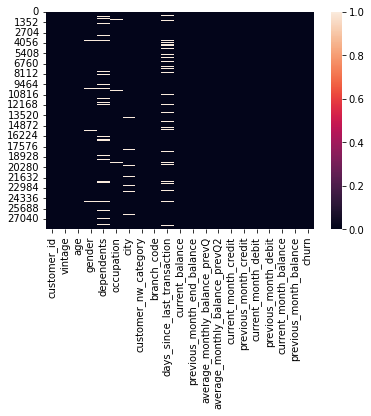

In [105]:
sns.heatmap(df.isna())


- Lots of missing values in days since last transaction  and dependants ,has to choose values carefully for those

In [106]:
df.dependents.value_counts()/(df.shape[0])*100

0.0     75.523219
2.0      7.575224
1.0      4.915087
3.0      2.469875
4.0      0.630681
5.0      0.144458
6.0      0.028187
7.0      0.010570
9.0      0.003523
52.0     0.003523
36.0     0.003523
50.0     0.003523
8.0      0.003523
25.0     0.003523
32.0     0.003523
Name: dependents, dtype: float64

- we can assume most of na as 0 since 75% of data is 0 ,and other values are way to low in numbers to choose 

In [107]:
df['dependents'].fillna(0,inplace=True)


In [108]:
df.gender.value_counts()/df.shape[0]*100

Male      58.304559
Female    39.845677
Name: gender, dtype: float64

- Gender seems to be distributed fairly ,cant choose value on mode of it might lead to bias in data
- instead just add new class -1 for null values

In [109]:
dict_g={'Male' : 0,
       'Female': 1}
df['gender']=df['gender'].map(dict_g)
df['gender'].fillna(-1,inplace=True)

In [110]:
df.gender.value_counts()

 0.0    16548
 1.0    11309
-1.0      525
Name: gender, dtype: int64

In [111]:
df.city.value_counts()/df.shape[0]*100

1020.0    12.257769
1096.0     7.103094
409.0      4.700162
146.0      4.548658
834.0      4.009584
            ...    
748.0      0.003523
1099.0     0.003523
108.0      0.003523
655.0      0.003523
723.0      0.003523
Name: city, Length: 1604, dtype: float64

- As city too seems to be biased majority to 1020 code its better to fill na with those

In [112]:
df.city.fillna(df.city.mode()[0],inplace=True)


In [113]:
df.days_since_last_transaction.value_counts()

0.0      1672
3.0       831
14.0      654
4.0       632
6.0       596
         ... 
309.0       1
225.0       1
183.0       1
92.0        1
334.0       1
Name: days_since_last_transaction, Length: 360, dtype: int64

- days since last transaction seems to have lot of discrete values cant just fill it with mode or mean better just give them huge value to mark their presence 

In [114]:
df['days_since_last_transaction'].fillna(999,inplace=True)


In [115]:
df.occupation.value_counts()/df.shape[0]*100

self_employed    61.574237
salaried         23.620605
student           7.251075
retired           7.131280
company           0.140934
Name: occupation, dtype: float64

- as can be seen more than 60% data is self_employed we can fill them mode or else we can see correlaction with other factors to predect occupation based on other feature

In [116]:
df.occupation.fillna(df.occupation.mode()[0],inplace=True)

<AxesSubplot:>

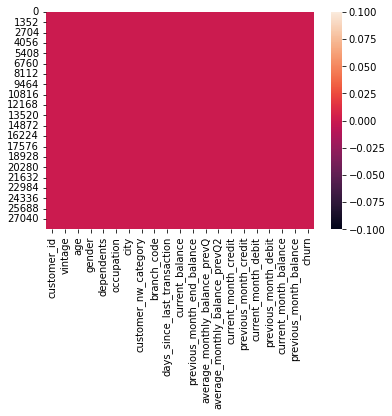

In [117]:
sns.heatmap(df.isna(),linecolor='white')

- Data has been fully imputed 

# Checking For outliers

<AxesSubplot:>

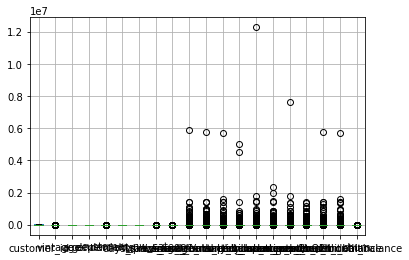

In [118]:
df.boxplot()

- There seems to lot of outliers Lets check Them based on Bank relationship and transaction 

<AxesSubplot:>

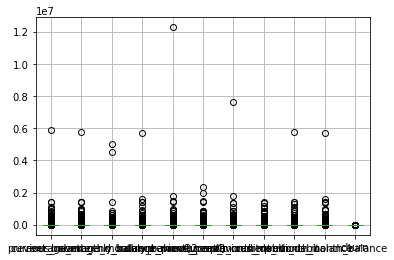

In [141]:
colm= ['current_balance',
            'previous_month_end_balance', 'average_monthly_balance_prevQ2', 'average_monthly_balance_prevQ',
            'current_month_credit','previous_month_credit', 'current_month_debit', 
            'previous_month_debit','current_month_balance', 'previous_month_balance','churn']
df[colm].boxplot()

- as we can see Most outlier seems to simmilar in range in all those data
- we can bring them low by logging and scaling

<AxesSubplot:>

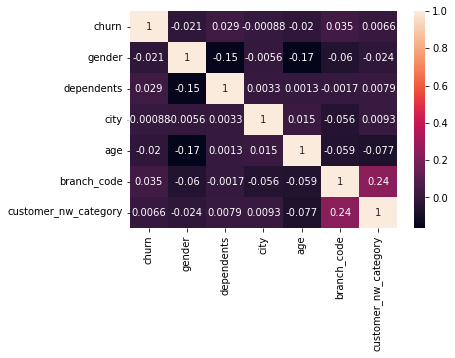

In [138]:
colm2=['churn','gender','dependents','occupation','city','age','branch_code','customer_nw_category']
sns.heatmap(df[colm2].corr(),annot=df[colm2].corr())


<AxesSubplot:>

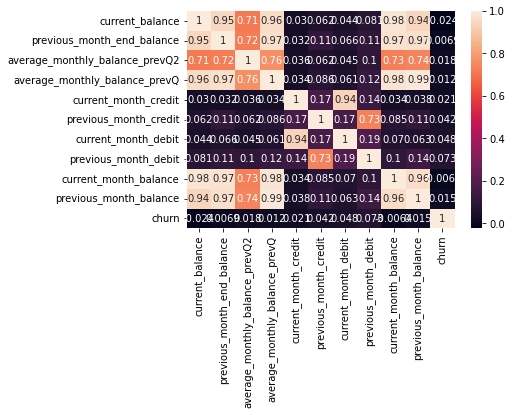

In [142]:
sns.heatmap(df[colm].corr(),annot=df[colm].corr())

<AxesSubplot:>

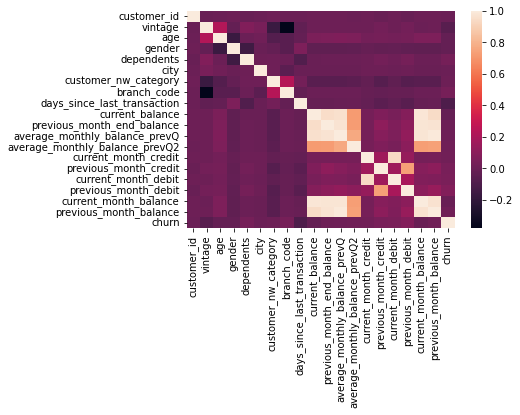

In [147]:

sns.heatmap(df.corr())

- we can see Most correlation is between customers credits and debit,with previous balance and all ,there isnt much correlation of them to caterogical features 